<a href="https://colab.research.google.com/github/sylvaiiin/FTIR-analysis/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 1 : data formatting for tree decision

Notebook written by Sylvain Caillaud

Notebook for testing table formatting and continous variable treatment

In [1]:
# charger numpy as np, matplotlib as plt
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rc('font', **{'size': 12}) # règle la taille de police globalement pour les plots (en pt)

In [3]:
import pandas as pd

In [4]:
ismulticlass = True

# Data loading

This notebook use a dataset on transposble elements. This dataset was created on genome sequencing accross differents accessions in *Arabidopsis thaliana*.

The dataset is available on my git https://raw.githubusercontent.com/sylvaiiin/TEmethylation/main/data/TE_ref.fulldataset.header.csv .


In [5]:
!wget https://raw.githubusercontent.com/sylvaiiin/TEmethylation/main/data/TE_nonref.filtered2.csv
df = pd.read_csv("TE_nonref.filtered2.csv", sep="\t")

# !wget https://raw.githubusercontent.com/sylvaiiin/TEmethylation/main/data/TE_ref.fulldataset.header.csv
# df = pd.read_csv("TE_ref.fulldataset.header.csv", sep="\t")

# !wget https://raw.githubusercontent.com/sylvaiiin/TEmethylation/main/data/TE_ref.filtered.csv
# df = pd.read_csv("TE_ref.filtered.csv", sep="\t")

--2022-04-19 10:45:53--  https://raw.githubusercontent.com/sylvaiiin/TEmethylation/main/data/TE_nonref.filtered2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5251161 (5.0M) [text/plain]
Saving to: ‘TE_nonref.filtered2.csv’

TE_nonref.filtered2 100%[===================>]   5.01M  --.-KB/s    in 0.07s   

2022-04-19 10:45:54 (67.9 MB/s) - ‘TE_nonref.filtered2.csv’ saved [5251161/5251161]



In [6]:
df.head()

,TEname,TEfamily,TEsuperfamily,Carry,LEFT.chr,LEFT.start,LEFT.end,LEFT.spot,LEFT.G1name,LEFT.G1orient,...,RIGHT.G2name,RIGHT.G2orient,RIGHT.G2dist,RIGHT.CGcompo,RIGHT.MeanC,RIGHT.MeanNC,RIGHT.logratio,RIGHT.pvalspread,RIGHT.pvaldemeth,Centro_dist
0,AT1-10001949-10001956-ATCOPIA28,ATCOPIA28,LTR/Copia,0.003704,1,10001649,10001949,intergene,AT1G28440,+,...,AT1G28460,+,3975,0.012852,0.000000,0.003693,-2.868450,6.403033e-01,0.359697,0.269930
1,AT1-10005763-10005772-ATDNAI27T9A,ATDNAI27T9A,DNA/MuDR,0.071504,1,10005463,10005763,intergene,AT1G28450,+,...,AT1G28470,+,4110,0.037122,0.761388,0.270289,0.449778,2.628227e-13,1.000000,0.269652
2,AT1-10012780-10012787-ATCOPIA49,ATCOPIA49,LTR/Copia,0.030435,1,10012480,10012780,intergene,AT1G28470,+,...,AT1G28490,+,2833,0.102082,0.601466,0.064101,0.972348,1.568303e-44,1.000000,0.269140
3,AT1-10015768-10015780-META1,META1,LTR/Copia,0.003247,1,10015468,10015768,intergene,AT1G28480,-,...,AT1G28500,+,2612,0.101331,0.000000,0.002986,-2.475030,NaN,NaN,0.268921
4,AT1-10015768-10015782-ATHILA7,ATHILA7,LTR/Gypsy,0.047170,1,10015468,10015768,intergene,AT1G28470,+,...,AT1G28500,+,2610,0.101394,0.002657,0.003012,-0.054345,6.366332e-01,0.363367,0.268921


## Dataset cleanup and formatting

We choose the columns that are interesting for decisions trees. We want supervised learning to develop a method to predict the spreading of methylation from the dataset. 

Some variables, such as TEname, are not informative for the supervised learning.

In [7]:
df = df.drop(columns=['TEname', 
                      'LEFT.start', 'LEFT.end', 'LEFT.G1dist', 'LEFT.G2name', 'LEFT.G2orient', 'LEFT.G2dist', 'LEFT.MeanC', 'LEFT.MeanNC', 'LEFT.logratio', 'LEFT.pvaldemeth', 
                      'RIGHT.chr', 'RIGHT.start', 'RIGHT.end', 'RIGHT.G1dist', 'RIGHT.G2name', 'RIGHT.G2orient', 'RIGHT.G2dist', 'RIGHT.MeanC', 'RIGHT.MeanNC', 'RIGHT.logratio', 'RIGHT.pvaldemeth'])

df = df.rename(columns={'LEFT.chr': 'Chr'})

In [8]:
df.head()

,TEfamily,TEsuperfamily,Carry,Chr,LEFT.spot,LEFT.G1name,LEFT.G1orient,LEFT.CGcompo,LEFT.pvalspread,RIGHT.spot,RIGHT.G1name,RIGHT.G1orient,RIGHT.CGcompo,RIGHT.pvalspread,Centro_dist
0,ATCOPIA28,LTR/Copia,0.003704,1,intergene,AT1G28440,+,0.029982,6.816591e-01,intergene,AT1G28450,+,0.012852,6.403033e-01,0.269930
1,ATDNAI27T9A,DNA/MuDR,0.071504,1,intergene,AT1G28450,+,0.059488,5.339231e-88,intergene,AT1G28460,+,0.037122,2.628227e-13,0.269652
2,ATCOPIA49,LTR/Copia,0.030435,1,intergene,AT1G28470,+,0.057420,5.661674e-06,intergene,AT1G28480,-,0.102082,1.568303e-44,0.269140
3,META1,LTR/Copia,0.003247,1,intergene,AT1G28480,-,0.029069,NaN,exon,AT1G28490,+,0.101331,NaN,0.268921
4,ATHILA7,LTR/Gypsy,0.047170,1,intergene,AT1G28470,+,0.028920,2.185482e-11,exon,AT1G28490,+,0.101394,6.366332e-01,0.268921


### P-Value
We have to correct the acceptation of the P-value wich the Bonferroni Correction.

There is 4 possible cases :

*   No spreading (1)
*   Spreading left (2)
*   Spreading right (3)
*   Spreading on both sides (4)



In [9]:
# Bonferonni correction -> 0.05/nbTE

df['LEFT.pvalspread'] = pd.cut(df['LEFT.pvalspread'],
                               bins = [-1, 0.05/df.shape[0], 1],
                               labels=['spread', 'nospread'])

df['RIGHT.pvalspread'] = pd.cut(df['RIGHT.pvalspread'],
                               bins = [-1, 0.05/df.shape[0], 1],
                               labels=['spread', 'nospread'])

print(df['LEFT.pvalspread'].value_counts())
print(df['RIGHT.pvalspread'].value_counts())

nospread    7492
spread      1764
Name: LEFT.pvalspread, dtype: int64
nospread    7545
spread      1719
Name: RIGHT.pvalspread, dtype: int64


In [10]:
#Creation of the output column

if (ismulticlass):
  def f(row):
      if row['LEFT.pvalspread'] == 'nospread' and row['RIGHT.pvalspread'] == 'nospread':
          val = 1
      elif row['LEFT.pvalspread'] == 'spread' and row['RIGHT.pvalspread'] == 'nospread':
          val = 2
      elif row['LEFT.pvalspread'] == 'nospread' and row['RIGHT.pvalspread'] == 'spread':
          val = 3
      else:
          val = 4
      return val
else :
  def f(row):
      if row['LEFT.pvalspread'] == 'nospread' and row['RIGHT.pvalspread'] == 'nospread':
          val = 0
      else:
          val = 1
      return val

df['Spreading'] = df.apply(f, axis=1)

print(df['Spreading'].value_counts())


4    8397
1    6396
2    1046
3    1007
Name: Spreading, dtype: int64


In [11]:
df.head()

,TEfamily,TEsuperfamily,Carry,Chr,LEFT.spot,LEFT.G1name,LEFT.G1orient,LEFT.CGcompo,LEFT.pvalspread,RIGHT.spot,RIGHT.G1name,RIGHT.G1orient,RIGHT.CGcompo,RIGHT.pvalspread,Centro_dist,Spreading
0,ATCOPIA28,LTR/Copia,0.003704,1,intergene,AT1G28440,+,0.029982,nospread,intergene,AT1G28450,+,0.012852,nospread,0.269930,1
1,ATDNAI27T9A,DNA/MuDR,0.071504,1,intergene,AT1G28450,+,0.059488,spread,intergene,AT1G28460,+,0.037122,spread,0.269652,4
2,ATCOPIA49,LTR/Copia,0.030435,1,intergene,AT1G28470,+,0.057420,nospread,intergene,AT1G28480,-,0.102082,spread,0.269140,3
3,META1,LTR/Copia,0.003247,1,intergene,AT1G28480,-,0.029069,NaN,exon,AT1G28490,+,0.101331,NaN,0.268921,4
4,ATHILA7,LTR/Gypsy,0.047170,1,intergene,AT1G28470,+,0.028920,spread,exon,AT1G28490,+,0.101394,nospread,0.268921,2


In [12]:
df = df.drop(columns=['LEFT.pvalspread', 'RIGHT.pvalspread'])

In [13]:
#df = df.drop(columns=['TEfamily'])

## Preprocessing


### Variable conversions to numerical values

In [14]:
from sklearn import preprocessing

In [15]:
df = pd.get_dummies(df, columns=['Chr'])

In [16]:
label_encoder = preprocessing.LabelEncoder()

for col in df.columns:
  if (col not in ["Carry", "LEFT.CGcompo", "RIGHT.CGcompo", "Centro_dist"]):
    df[col] = label_encoder.fit_transform(df[col])

Let's observe the data once again : 

In [17]:
df.head()

,TEfamily,TEsuperfamily,Carry,LEFT.spot,LEFT.G1name,LEFT.G1orient,LEFT.CGcompo,RIGHT.spot,RIGHT.G1name,RIGHT.G1orient,RIGHT.CGcompo,Centro_dist,Spreading,Chr_1,Chr_2,Chr_3,Chr_4,Chr_5
0,26,7,0.003704,1,762,0,0.029982,1,759,0,0.012852,0.269930,0,1,0,0,0,0
1,104,4,0.071504,1,763,0,0.059488,1,760,0,0.037122,0.269652,3,1,0,0,0,0
2,47,7,0.030435,1,764,0,0.057420,1,761,1,0.102082,0.269140,2,1,0,0,0,0
3,198,7,0.003247,1,765,1,0.029069,0,762,0,0.101331,0.268921,3,1,0,0,0,0
4,153,8,0.047170,1,764,0,0.028920,0,762,0,0.101394,0.268921,1,1,0,0,0,0


### Data Matrix creation X and y

In [18]:
X = np.array(df.drop(columns=['Spreading']))

In [19]:
y = np.array(df['Spreading'])

In [20]:
print(X.shape, y.shape)

(16846, 17) (16846,)


In [21]:
print(X[:10,:])

[[2.60000e+01 7.00000e+00 3.70370e-03 1.00000e+00 7.62000e+02 0.00000e+00
  2.99815e-02 1.00000e+00 7.59000e+02 0.00000e+00 1.28519e-02 2.69930e-01
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [1.04000e+02 4.00000e+00 7.15037e-02 1.00000e+00 7.63000e+02 0.00000e+00
  5.94877e-02 1.00000e+00 7.60000e+02 0.00000e+00 3.71218e-02 2.69652e-01
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [4.70000e+01 7.00000e+00 3.04348e-02 1.00000e+00 7.64000e+02 0.00000e+00
  5.74203e-02 1.00000e+00 7.61000e+02 1.00000e+00 1.02082e-01 2.69140e-01
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [1.98000e+02 7.00000e+00 3.24675e-03 1.00000e+00 7.65000e+02 1.00000e+00
  2.90693e-02 0.00000e+00 7.62000e+02 0.00000e+00 1.01331e-01 2.68921e-01
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [1.53000e+02 8.00000e+00 4.71698e-02 1.00000e+00 7.64000e+02 0.00000e+00
  2.89203e-02 0.00000e+00 7.62000e+02 0.00000e+00 1.01394e-01 2.68921e-01
  1.0000

## Selection of training and test sets

We are going to cut our dataset between a training and a validation set. We will cut the training set in 10 folds for cross-validation.

In [22]:
from sklearn import model_selection

### Training and test sets

In [23]:
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y,
                                    test_size=0.3, # 30% des données dans le jeu de test
                                    random_state=1 # graine du générateur aléatoire
                                    )

## Cross-validation

In [24]:
n_folds = 10

# Créer un objet KFold qui permettra de cross-valider en n_folds folds
kf = model_selection.KFold(n_splits=n_folds,  
                           shuffle=True # mélanger les échantillons avant de créer les folds
                          )

# Utiliser kf pour partager le jeu d'entraînement en n_folds folds. 
# kf.split retourne un iterateur (consommé après une boucle).
# Pour pouvoir se servir plusieurs fois des mêmes folds, nous transformons cet itérateur en liste d'indices :
kf_indices = list(kf.split(X_train))

# Random forest

In [25]:
from sklearn import ensemble

### Cross validation on the max depth and the number of tree

In [26]:
d_values = np.array([3, 4, 10, 20])
n_values = np.array([10, 20, 50, 100, 150])#, 100, 200, 500])

In [27]:
# Instanciation d'un objet GridSearchCV
grid_rf = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), # prédicteur à évaluer
                                       {'max_depth': d_values, 'n_estimators': n_values}, # dictionnaire de valeurs d'hyperparamètres
                                       cv=kf_indices, # validation croisée à utiliser
                                       scoring='f1_weighted' # métrique d'évaluation de la performance
                                       )

In [28]:
%%time

# Utilisation de cet objet sur les données d'entraînement
grid_rf.fit(X_train, y_train)

CPU times: user 2min 44s, sys: 608 ms, total: 2min 45s
Wall time: 2min 52s


GridSearchCV(cv=[(array([    0,     1,     2, ..., 11788, 11789, 11790]),
                  array([    3,    10,    14, ..., 11765, 11777, 11791])),
                 (array([    0,     1,     2, ..., 11788, 11790, 11791]),
                  array([   15,    21,    29, ..., 11760, 11766, 11789])),
                 (array([    0,     2,     3, ..., 11789, 11790, 11791]),
                  array([    1,    12,    17, ..., 11738, 11741, 11772])),
                 (array([    0,     1,     2, ..., 11789, 11790, 11791]),
                  array([    9,    26,    27, ..., 11756, 11762, 11781])),
                 (array([    0,     1,     2, ..., 11...
                 (array([    0,     1,     2, ..., 11789, 11790, 11791]),
                  array([    8,    25,    32, ..., 11783, 11784, 11786])),
                 (array([    0,     1,     3, ..., 11789, 11790, 11791]),
                  array([    2,     4,     5, ..., 11757, 11764, 11787])),
                 (array([    0,     1,     2, ...

In [29]:
print(grid_rf.best_params_)

{'max_depth': 20, 'n_estimators': 150}


In [30]:
# Reorganize the tables in 2D
mean_test_score_array = np.reshape(grid_rf.cv_results_['mean_test_score'], (len(d_values), len(n_values)))
std_test_score_array = np.reshape(grid_rf.cv_results_['std_test_score'], (len(d_values), len(n_values)))

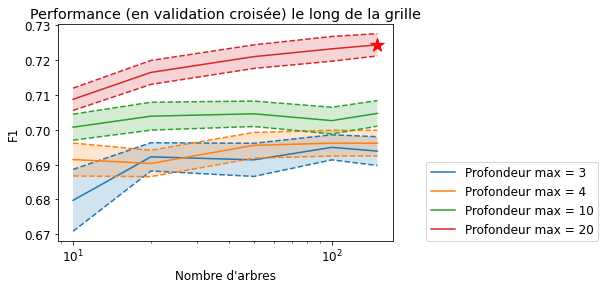

In [31]:
for (idx, d) in enumerate(d_values):
    mean_test_score = mean_test_score_array[idx, :]
    stde_test_score = std_test_score_array[idx, :] / np.sqrt(n_folds) # standard error

    p = plt.plot(n_values, mean_test_score, label="Profondeur max = %d" % d)
    plt.plot(n_values, (mean_test_score + stde_test_score), '--', color=p[0].get_color())
    plt.plot(n_values, (mean_test_score - stde_test_score), '--', color=p[0].get_color())
    plt.fill_between(n_values, (mean_test_score + stde_test_score), 
                     (mean_test_score - stde_test_score), alpha=0.2)
    
    # Afficher les meilleurs hyperparamètres
    if d == grid_rf.best_params_['max_depth']:
        best_ntree_index = np.where(n_values == grid_rf.best_params_['n_estimators'])[0][0]
        plt.scatter(n_values[best_ntree_index], mean_test_score[best_ntree_index], 
                   marker='*', s=200, color='red')
        
plt.legend(loc=(1.1, 0))
plt.xlabel("Nombre d'arbres")
plt.ylabel('F1')
plt.title("Performance (en validation croisée) le long de la grille")
plt.xscale('log') # utiliser une échelle logarithmique en abcisse

### Optimal random forest

In [32]:
print("Meilleur F1 en validation croisée : %.3f" % grid_rf.best_score_)

Meilleur F1 en validation croisée : 0.724


In [33]:
model_rf_best = grid_rf.best_estimator_

### Variable importance

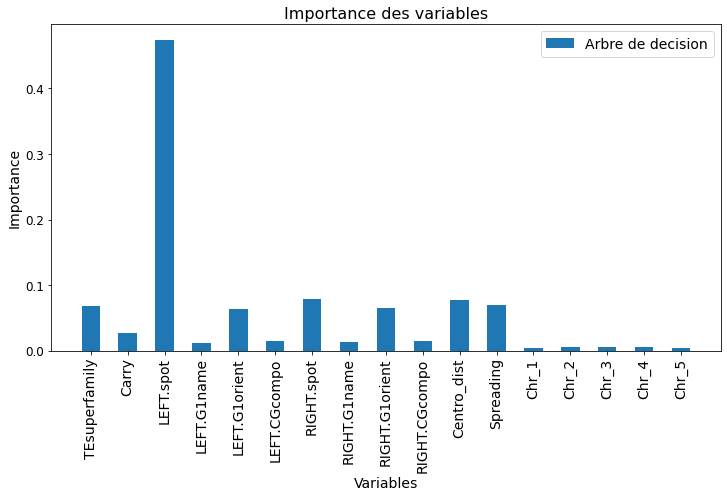

In [34]:
fig = plt.figure(figsize(12, 6))

num_features = X_train.shape[1]

# Afficher les importances de l'arbre de décision
plt.bar(range(num_features), model_rf_best.feature_importances_,
           label="Arbre de decision", width=0.5)

# Légende
tmp = plt.legend(fontsize=14)

# Axe des abcisses
plt.xlabel('Variables', fontsize=14)
feature_names = list(df.columns[1:])
tmp = plt.xticks(range(num_features), feature_names, 
                 rotation=90, fontsize=14)

# Axe des ordonnées
tmp = plt.ylabel('Importance', fontsize=14)

# Titre
tmp = plt.title('Importance des variables', fontsize=16)

# Gradient Boosting

the gradient boosting is implementated in scikit-learn in the class [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html?highlight=boosting#sklearn.ensemble.GradientBoostingClassifier) in the module `ensemble`.

## Cross validation and hyperparmeters selection

In [38]:
n_values = np.array([50, 100, 150])
d_values = np.array([3,10, 20])

In [39]:
# Instanciation d'un objet GridSearchCV
grid_boost = model_selection.GridSearchCV(ensemble.GradientBoostingClassifier(), # prédicteur à évaluer
                                       {'max_depth' : d_values, 'n_estimators': n_values}, # dictionnaire de valeurs d'hyperparamètres
                                       cv=kf_indices, # validation croisée à utiliser
                                       scoring='f1_weighted' # métrique d'évaluation de la performance
                                       )

In [40]:
%%time

# Utilisation de cet objet sur les données d'entraînement
grid_boost.fit(X_train, y_train)

CPU times: user 1h 9min 40s, sys: 14.3 s, total: 1h 9min 55s
Wall time: 1h 9min 41s


GridSearchCV(cv=[(array([    0,     1,     2, ..., 11788, 11789, 11790]),
                  array([    3,    10,    14, ..., 11765, 11777, 11791])),
                 (array([    0,     1,     2, ..., 11788, 11790, 11791]),
                  array([   15,    21,    29, ..., 11760, 11766, 11789])),
                 (array([    0,     2,     3, ..., 11789, 11790, 11791]),
                  array([    1,    12,    17, ..., 11738, 11741, 11772])),
                 (array([    0,     1,     2, ..., 11789, 11790, 11791]),
                  array([    9,    26,    27, ..., 11756, 11762, 11781])),
                 (array([    0,     1,     2, ..., 11...
                 (array([    0,     1,     2, ..., 11789, 11790, 11791]),
                  array([    8,    25,    32, ..., 11783, 11784, 11786])),
                 (array([    0,     1,     3, ..., 11789, 11790, 11791]),
                  array([    2,     4,     5, ..., 11757, 11764, 11787])),
                 (array([    0,     1,     2, ...

In [41]:
print(grid_boost.best_params_)

{'max_depth': 10, 'n_estimators': 100}


In [42]:
# Reorganize in a 2D table
mean_test_score_array = np.reshape(grid_boost.cv_results_['mean_test_score'], (len(d_values), len(n_values)))
std_test_score_array = np.reshape(grid_boost.cv_results_['std_test_score'], (len(d_values), len(n_values)))

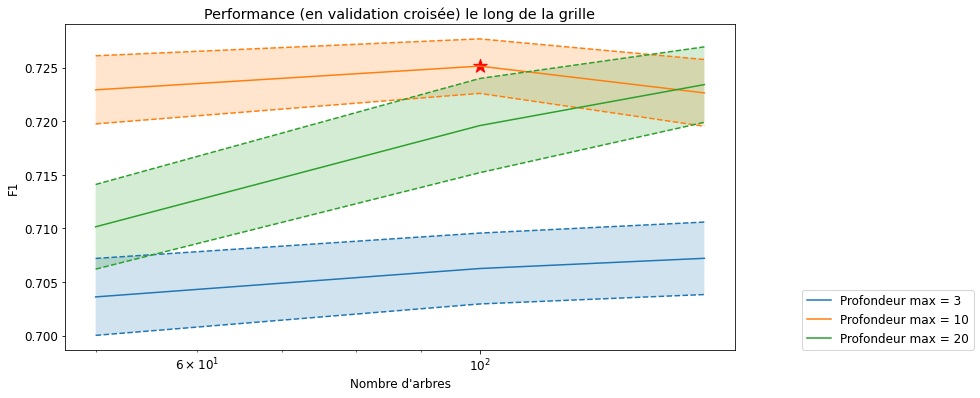

In [43]:
for (idx, d) in enumerate(d_values):
    mean_test_score = mean_test_score_array[idx, :]
    stde_test_score = std_test_score_array[idx, :] / np.sqrt(n_folds) # standard error

    p = plt.plot(n_values, mean_test_score, label="Profondeur max = %d" % d)
    plt.plot(n_values, (mean_test_score + stde_test_score), '--', color=p[0].get_color())
    plt.plot(n_values, (mean_test_score - stde_test_score), '--', color=p[0].get_color())
    plt.fill_between(n_values, (mean_test_score + stde_test_score), 
                     (mean_test_score - stde_test_score), alpha=0.2)
    
    # Afficher les meilleurs hyperparamètres
    if d == grid_boost.best_params_['max_depth']:
        best_ntree_index = np.where(n_values == grid_boost.best_params_['n_estimators'])[0][0]
        plt.scatter(n_values[best_ntree_index], mean_test_score[best_ntree_index], 
                   marker='*', s=200, color='red')
        
plt.legend(loc=(1.1, 0))
plt.xlabel("Nombre d'arbres")
plt.ylabel('F1')
plt.title("Performance (en validation croisée) le long de la grille")
plt.xscale('log') # utiliser une échelle logarithmique en abcisse

## Optimal boosting

In [44]:
print("Meilleur F1 en validation croisée : %.3f" % grid_boost.best_score_)

Meilleur F1 en validation croisée : 0.725


In [45]:
model_boost_best = grid_boost.best_estimator_

## Variable importance

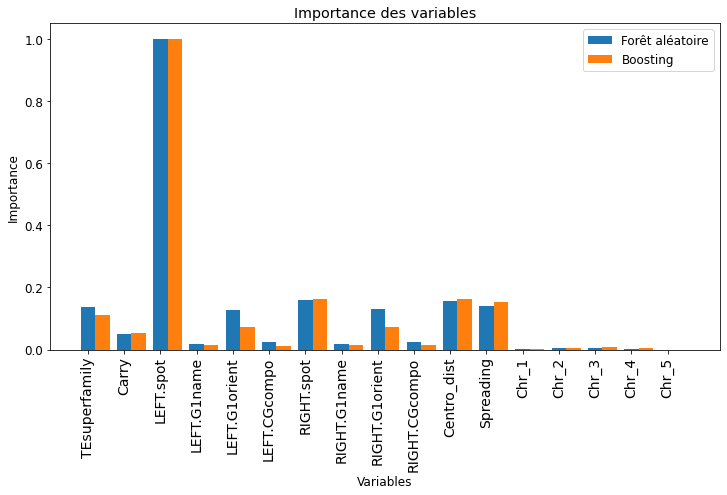

In [47]:
fig = plt.figure(figsize(12, 6))

num_features = X_train.shape[1]


### Forêt aléatoire
# Ramener les importances entre 0 et 1
rf_importances = model_rf_best.feature_importances_
rf_importances_min = np.min(rf_importances)
rf_importances_max = np.max(rf_importances)
rf_importances = (rf_importances-rf_importances_min)/(rf_importances_max-rf_importances_min)

# Afficher les importances de la forêt
plt.bar((np.arange(num_features)),  rf_importances,
           label="Forêt aléatoire", width=0.4)

### Boosting
# Ramener les importances entre 0 et 1
boost_importances = model_boost_best.feature_importances_
boost_importances_min = np.min(boost_importances)
boost_importances_max = np.max(boost_importances)
boost_importances = (boost_importances-boost_importances_min)/(boost_importances_max-boost_importances_min)

# Afficher les importances du boosting
plt.bar((np.arange(num_features)+0.4),  boost_importances,
           label="Boosting", width=0.4)

# Légende
tmp = plt.legend()

# Axe des abcisses
plt.xlabel('Variables')
feature_names = list(df.columns[1:])
tmp = plt.xticks(range(num_features), feature_names, 
                 rotation=90, fontsize=14)

# Axe des ordonnées
tmp = plt.ylabel('Importance')

# Titre
tmp = plt.title('Importance des variables')

# Final model

In [49]:
my_model = model_boost_best # TODO : insérez ici le nom du modèle que vous avez choisi.

# Prédire sur le jeu de test
y_pred = my_model.predict(X_test) 

In [50]:
from sklearn import metrics

In [52]:
print("F1 du modèle choisir sur le jeu de test : %.3f" % metrics.f1_score(y_test, y_pred, average = 'weighted'))

F1 du modèle choisir sur le jeu de test : 0.739


# Confusion matrix 

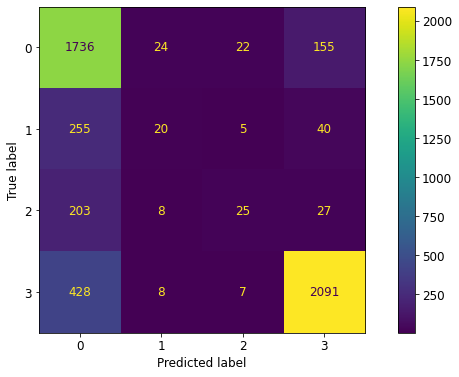

In [53]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)